In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('D:/Delivery_Time_Prediction/model/dataset/delivery.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [3]:
def calculate_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    R = 6371.0

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

data['Distance'] = data.apply(lambda row: calculate_distance(row['Delivery_location_latitude'],
                                                        row['Delivery_location_longitude'],
                                                        row['Restaurant_latitude'],
                                                        row['Restaurant_longitude']), axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [4]:
columns_to_drop = ['Delivery_location_latitude','Delivery_location_longitude','Restaurant_latitude','Restaurant_longitude']
data = data.drop(columns=columns_to_drop, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       45593 non-null  object 
 1   Delivery_person_ID       45593 non-null  object 
 2   Delivery_person_Age      45593 non-null  object 
 3   Delivery_person_Ratings  45593 non-null  object 
 4   Order_Date               45593 non-null  object 
 5   Time_Orderd              45593 non-null  object 
 6   Time_Order_picked        45593 non-null  object 
 7   Weatherconditions        45593 non-null  object 
 8   Road_traffic_density     45593 non-null  object 
 9   Vehicle_condition        45593 non-null  int64  
 10  Type_of_order            45593 non-null  object 
 11  Type_of_vehicle          45593 non-null  object 
 12  multiple_deliveries      45593 non-null  object 
 13  Festival                 45593 non-null  object 
 14  City                  

In [5]:
X = data[['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Order_Date', 'Time_Orderd',
        'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
        'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'Distance']]
y = data['Time_taken']

In [6]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2*100)

Mean Squared Error: 17.503013411558285
R-squared: 80.0371973395173


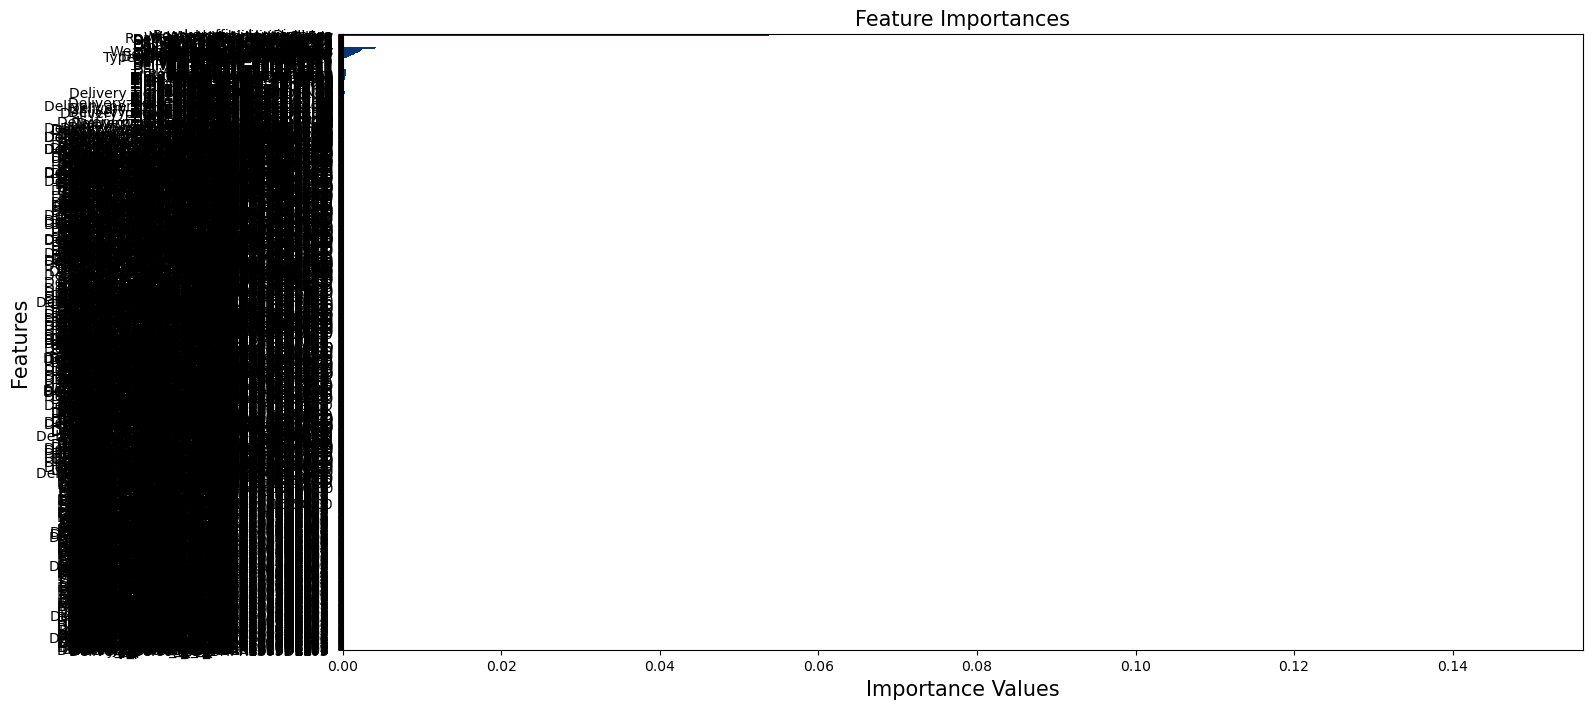

In [10]:
from mycolorpy import colorlist as mcp

imp = list(model.feature_importances_)
importances = pd.DataFrame({"feature": X_train.columns, "importance": imp})
importances = importances.sort_values(by="importance")
colors = mcp.gen_color(cmap='Blues', n=len(importances))
ax = importances.plot(kind='barh', x='feature', y='importance', figsize=(16,8), color=colors, legend=False)
plt.xlabel("Importance Values", fontsize=15)
plt.ylabel("Features", fontsize=15)
plt.title("Feature Importances", fontsize=15)
plt.show()

In [11]:
importances = importances.sort_values(by="importance", ascending=False)
importances.reset_index(inplace=True, drop=True)
importances[:7]

,feature,importance
0,Road_traffic_density_Low,0.148964
1,Distance,0.119385
2,Weatherconditions_ Sunny,0.100817
3,Vehicle_condition,0.093946
4,Weatherconditions_ Fog,0.057553
5,Weatherconditions_ Cloudy,0.053825
6,multiple_deliveries_2,0.030611


In [12]:
X = data[['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
          'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Distance']]
y = data['Time_taken']

In [13]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [15]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2*100)

Mean Squared Error: 18.88432488600668
R-squared: 78.46176299980159


In [16]:
from fileinput import filename
import pickle
filename = 'timePred.pkl'
pickle.dump(model, open(filename, 'wb'))
load_model = pickle.load(open(filename,'rb'))